In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3R2bGNlay9Eb2N1bWVudHMvZ2l0bGFiX2J5bmRzaW0vdGVhY2hpbmcvSW50cm9kdWN0aW9uLXRvLVB5dGhvbi9wYXJ0LTA0'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

{"/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1712665886.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1712665886.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1712665884.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1712665884.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1712665885.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1712665885.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1712665885.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/abc.py": 1712665884.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/io.py": 1712665884.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/stat.py": 1712665884.0, "/Libr

/var/folders/4y/byjhjgbj7vd23ydcvxncvkzr0000gn/T/ipykernel_28276/298450881.py:25: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [2]:
#| eval: true

def greet(name):
    return f"Welcome to this lecture, {name}!"

print(greet("Students"))

Welcome to this lecture, Students!


In [3]:
#| eval: false

def greet(name):
    greeting = f"Welcome to this lecture, {name}!"
    return greeting

print(greeting) # This will cause an error

In [4]:
#| eval: true

class Lectures:  
    def __init__(self, name, length_minutes):
        self.name = name
        self.length = length_minutes

    def duration(self):
        return f"Lecture '{self.name}' is {self.length} minutes long!"

lecture_4 = Lectures("4. Data in more than one dimension", 90)
print(lecture_4.duration())

Lecture '4. Data in more than one dimension' is 90 minutes long!


In [5]:
#| eval: true

my_tuple = (1, 2, 3, 4, 5)
print(my_tuple)

(1, 2, 3, 4, 5)


In [6]:
#| eval: true

my_tuple = (1, 2, 3)    
print(my_tuple[1:3])
print(my_tuple + (4, 5, 6))
print(my_tuple * 2)

(2, 3)
(1, 2, 3, 4, 5, 6)
(1, 2, 3, 1, 2, 3)


In [7]:
#| eval: true

my_tuple = (1, 2, 3, 2, 4, 2)
print(my_tuple.count(2))
print(my_tuple.index(3))

3
2


In [8]:
#| eval: true

my_tuple = ("Peter", 25, "Hamburg")
print(my_tuple)

('Peter', 25, 'Hamburg')


In [9]:
#| eval: true
# This works as well
my_tuple = "Peter", 25, "Hamburg"
print(my_tuple)

('Peter', 25, 'Hamburg')


In [10]:
#| eval: true

def get_student_info(name, age, city):
    return name, age, city

student_info = get_student_info("Peter", 25, "Hamburg")
print(student_info)

('Peter', 25, 'Hamburg')


In [11]:
#| eval: true

def get_student_info(name, age, city):
    return name, age, city
name, *rest = get_student_info("Peter", 25, "Hamburg")
print(f"Name: {name}")
print(f"Other info: {rest}")

Name: Peter
Other info: [25, 'Hamburg']


In [12]:
#| eval: true

my_list = [1, 2, 3, 4, 5]
print(my_list)

[1, 2, 3, 4, 5]


In [13]:
#| eval: false
#| 
# Imagine the following shoppping list for this weekend
shopping_list = ["cider", "beer", "bread", "frozen_pizza"]

In [14]:
#| eval: true

my_set = {1, 2, 2, 5, 5}
print(my_set)

{1, 2, 5}


In [15]:
#| eval: false
#| 
# You have a list of friends from two different groups
friends_group_1 = ["Neo", "Morpheus", "Trinity", "Cypher"]
friends_group_2 = [ "Smith", "Apoc", "Cypher", "Morpheus"]

In [16]:
#| eval: true

who_am_i = {"name": "Tobias", "age": 30, "city": "Hamburg"}
print(who_am_i)

{'name': 'Tobias', 'age': 30, 'city': 'Hamburg'}


In [17]:
#| eval: true

who_am_i = {"name": "Tobias", "age": 30, "city": "Hamburg"}
print(who_am_i["name"])

Tobias


In [18]:
#| eval: false

# Create a dictionary with the following information about yourself: name, age, city
i_am = {}

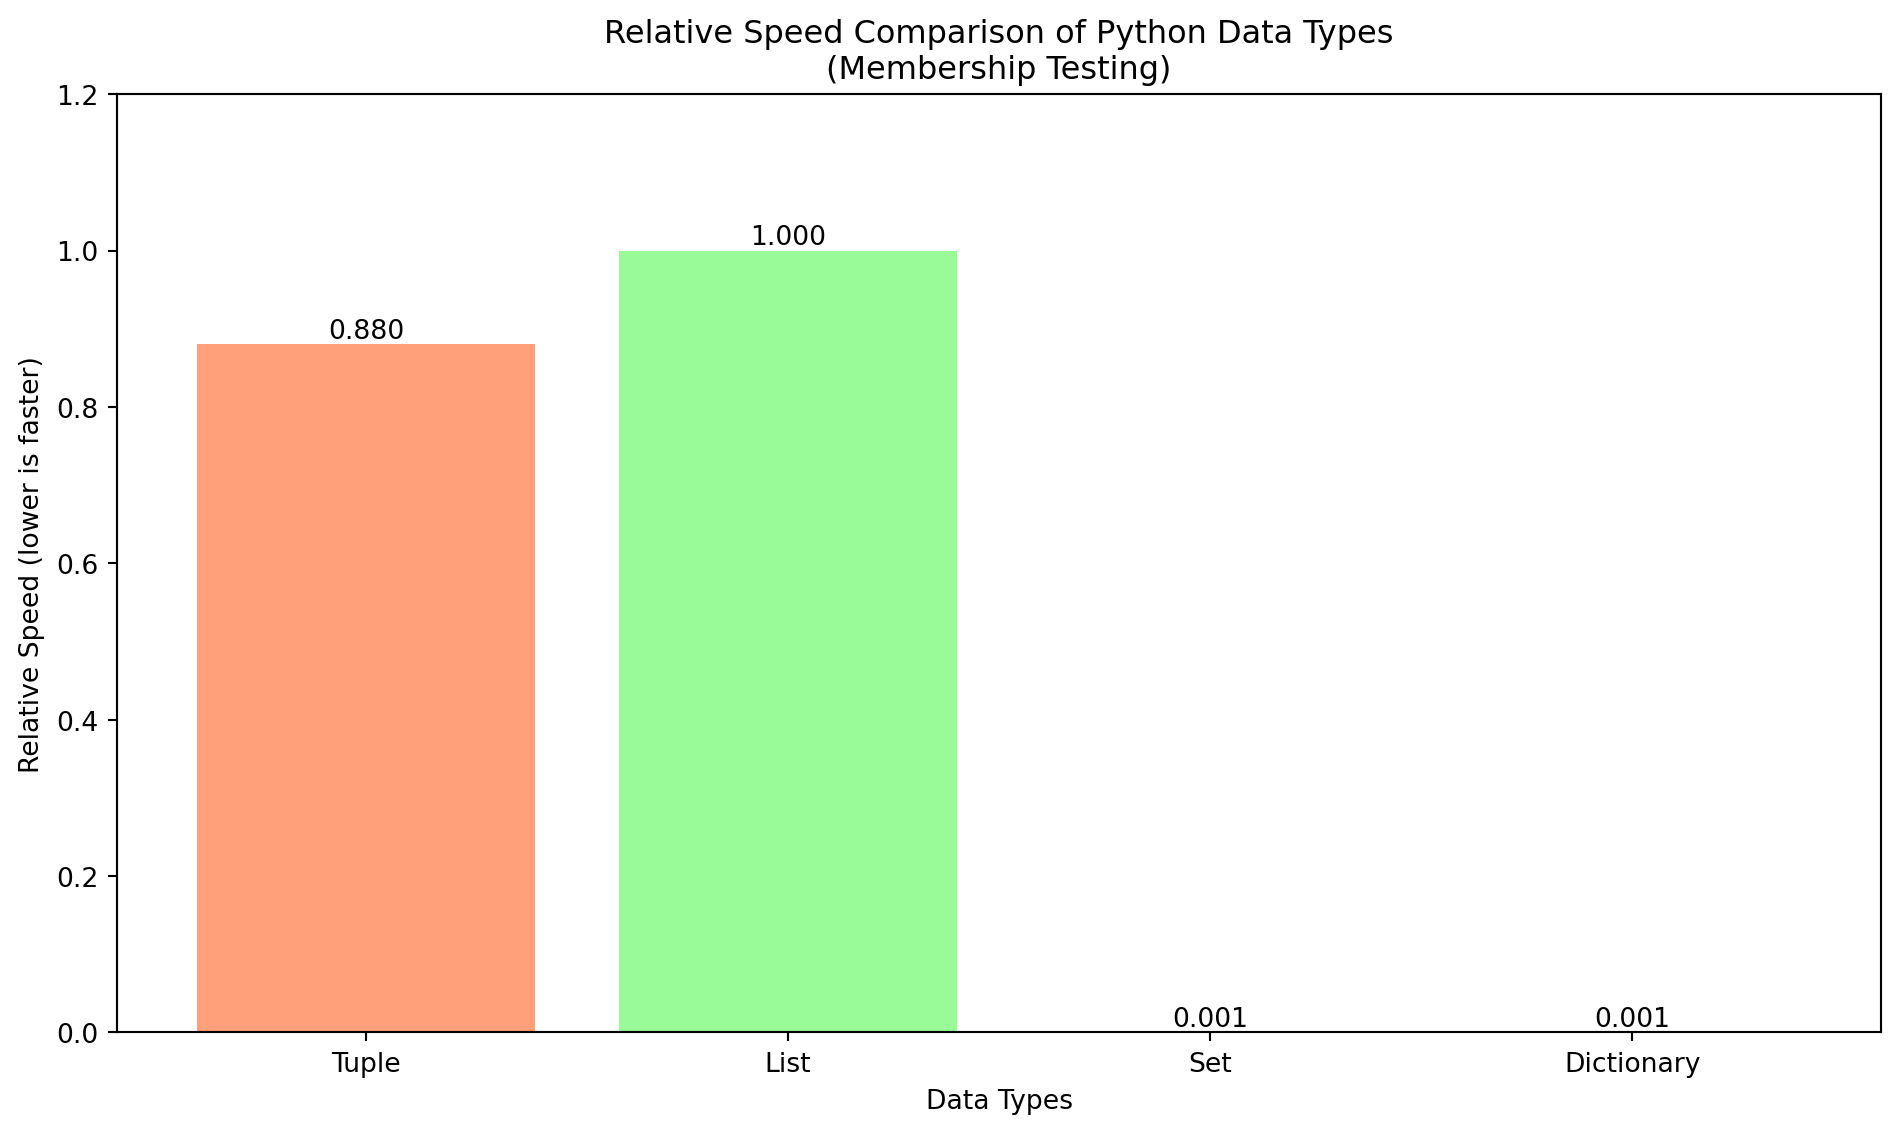

Graph saved as 'data_type_speed_comparison.png'

Relative speeds:
Tuple: 0.880
List: 1.000
Set: 0.001
Dictionary: 0.001


In [19]:
#| eval: true
#| code-fold: true

import timeit
import matplotlib.pyplot as plt

def test_membership(data_structure, element):
    return element in data_structure

# Setup for each data structure
setup_tuple = "data = tuple(range(10000))"
setup_list = "data = list(range(10000))"
setup_set = "data = set(range(10000))"
setup_dict = "data = {i: i for i in range(10000)}"

# Timeit statements
tuple_time = timeit.timeit("test_membership(data, 9999)", setup=f"{setup_tuple}\nfrom __main__ import test_membership", number=100000)
list_time = timeit.timeit("test_membership(data, 9999)", setup=f"{setup_list}\nfrom __main__ import test_membership", number=100000)
set_time = timeit.timeit("test_membership(data, 9999)", setup=f"{setup_set}\nfrom __main__ import test_membership", number=100000)
dict_time = timeit.timeit("test_membership(data, 9999)", setup=f"{setup_dict}\nfrom __main__ import test_membership", number=100000)

# Normalize times relative to list (slowest)
max_time = max(tuple_time, list_time, set_time, dict_time)
relative_speeds = {
    'Tuple': tuple_time / max_time,
    'List': list_time / max_time,
    'Set': set_time / max_time,
    'Dictionary': dict_time / max_time
}

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(relative_speeds.keys(), relative_speeds.values(), color=['#FFA07A', '#98FB98', '#87CEFA', '#DDA0DD'])

plt.title('Relative Speed Comparison of Python Data Types\n(Membership Testing)')
plt.xlabel('Data Types')
plt.ylabel('Relative Speed (lower is faster)')
plt.ylim(0, 1.2)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Graph saved as 'data_type_speed_comparison.png'")
print("\nRelative speeds:")
for data_type, speed in relative_speeds.items():
    print(f"{data_type}: {speed:.3f}")

In [20]:
#| eval: false

name = input("Please enter your name: ")    
print(f"Hello, {name}!")

In [21]:
#| eval: true
file = open("hi.txt", "w") # This creates a file called "hi.txt"
file.write("Hello, World!") # This writes "Hello, World!" to the file
file.close() # This closes the file
print("File successfully written")

File successfully written


In [22]:
#| eval: true

file = open("hi.txt", "r") # This opens the file "hi.txt"
content = file.read() # This reads the content of the file
file.close() # This closes the file
print(content) # This prints the content of the file

Hello, World!


In [23]:
#| eval: true

with open("hi_again.txt", "w") as file:
    file.write("Hello again, World!")

print("File successfully written")

File successfully written
